In [1]:
from sympy import Derivative, symbols, diff, simplify, lambdify
from sympy import Symbol
from sympy import cosh,sin,atan,exp,tanh

import sympy as sp

# 定义一个符号变量
x = sp.symbols('x')
# 定义自定义函数
class sigmoid(sp.Function):
    @classmethod
    def eval(cls, x):
        # 自定义函数逻辑，例如 sigmoid
        return 1 / (1 + sp.exp(-x))

In [2]:
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = symbols('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10')
dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10 = symbols('dx1 dx2 dx3 dx4 dx5 dx6 dx7 dx8 dx9 dx10')
# 定义表达式内容
Y = -0.83*cosh(-0.01*(1 - 0.76*x8)**2 + 
               0.01*sin(3.12*x1 - 6.13) + 
               0.36*sin(1.1*x10 - 3.74) + 
               0.01*sin(3.89*x6 - 1.68) + 
               0.02*sin(3.32*x7 - 2.7) - 
               2.27 - 
               0.09*exp(-2.32*(-x5 - 0.51)**2) + 
               0.17*exp(-17.66*(-0.44*x2 - 1)**2)) - 2.85*cosh(-0.12*(-0.28*x1 - 1)**2 + 
                                                                0.19*sin(1.23*x10 - 6.79) + 
                                                                0.01*sin(4.26*x5 + 2.09) - 
                                                                0.27*sin(1.88*x9 - 8.37) + 
                                                                0.05*tanh(4.53*x8 + 8.6) - 
                                                                1.1 + 
                                                                0.07*exp(-3.45*(-x7 - 0.35)**2) - 
                                                                0.05*exp(-9.59*(-0.49*x6 - 1)**2) + 
                                                                0.04*exp(-34.43*(-0.38*x4 - 1)**2) + 
                                                                0.08*exp(-15.05*(-0.45*x2 - 1)**2)) + 9.14


In [3]:
approx_Y = (Y +
            diff(Y, x1)*dx1 +
            diff(Y, x2)*dx2 + 
            diff(Y, x3)*dx3 + 
            diff(Y, x4)*dx4 +
            diff(Y, x5)*dx5 +
            diff(Y, x6)*dx6 + 
            diff(Y, x7)*dx7 +
            diff(Y, x8)*dx8 +
            diff(Y, x9)*dx9 +
            diff(Y, x10)*dx10)

f = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10], 
             approx_Y) 

f_Y = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10], 
               Y) 

In [4]:
import pytz
import time
import datetime
from data_process import data_process_without_norm
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df = data_process_without_norm()
df = df.drop("entsoe",axis=1)
loc_tz = pytz.timezone('Europe/Zurich')
split_date_train_ = loc_tz.localize(datetime.datetime(2016,10,1,0,0,0,0))
split_date_train = loc_tz.localize(datetime.datetime(2016,12,1,0,0,0,0))
split_date_test = loc_tz.localize(datetime.datetime(2016,12,15,0,0,0,0))

df_train_ = df.loc[(split_date_train_ < df.index)]
df_train = df_train_.loc[df_train_.index <= split_date_train].copy()
_temp_df = df.loc[split_date_test > df.index]
df_test = _temp_df.loc[_temp_df.index > split_date_train].copy()

# 输入标准化
scaler_input = StandardScaler()
# scaler_input = MinMaxScalerr()
_temp_scaled_input_data = scaler_input.fit_transform(df_train.iloc[:,1:])
x_train_input = _temp_scaled_input_data

#输出标准化
scaler_output = StandardScaler()
# scaler_input = MinMaxScaler()
_temp_scaled_output_data = scaler_output.fit_transform(np.array(df_train.iloc[:,0]).reshape(-1,1))
x_train_label = _temp_scaled_output_data

#测试集标准化
x_test_input = scaler_input.transform(df_test.iloc[:,1:])
x_test_label = scaler_output.transform(np.array(df_test.iloc[:,0]).reshape(-1,1))


_temp_train_input = np.hstack((x_train_input[:,:8],x_train_input[:,-3:-1]))
_temp_train_label = x_train_label

_temp_test_input = np.hstack((x_test_input[:,:8],x_test_input[:,-3:-1]))
_temp_test_label = x_test_label


_temp_train_input_for_NN = x_train_input

_temp_test_input_for_NN = x_test_input


dataset = dict()
dataset_ = dict()
dataset['train_input'] = _temp_train_input.astype(np.float32)
dataset_['train_input_for_NN'] = _temp_train_input_for_NN.astype(np.float32)
dataset['train_label'] = _temp_train_label.astype(np.float32)

dataset['test_input'] = _temp_test_input.astype(np.float32)
dataset_['test_input_for_NN'] = _temp_test_input_for_NN.astype(np.float32)
dataset['test_label'] = _temp_test_label.astype(np.float32)

# dataset['test_input'] = torch.tensor(np.array(X_test)[:,:32])
# dataset['test_label'] = torch.tensor(np.array(y_test))



In [5]:
import time
sample_nums=1000
pre_Y_appro = []
pre_Y_appro_one_order = []
pre_Y = []
delta_Y = []
start_time = time.time()
for i,_data in enumerate(dataset['test_input']):
    pre_Y_appro.append([])
    for sample in range(sample_nums):
        dx = np.random.normal(loc = 0, scale = 0.5, size = (8)).tolist()
        dx.append(0)
        dx.append(0)
        dx = np.array(dx)
        # dx = np.zeros(10)
        # _approx_Y_ = approx_Y.evalf(subs={x1: _data[0],
        #                      x2: _data[1], 
        #                      x3: _data[2], 
        #                      x4: _data[3], 
        #                      x5: _data[4], 
        #                      x6: _data[5], 
        #                      x7: _data[6], 
        #                      x8: _data[7], 
        #                      x9: _data[8], 
        #                      x10: _data[9],
        #                      dx1: dx[0], 
        #                      dx2: dx[1], 
        #                      dx3: dx[2], 
        #                      dx4: dx[3], 
        #                      dx5: dx[4], 
        #                      dx6: dx[5], 
        #                      dx7: dx[6], 
        #                      dx8: dx[7], 
        #                      dx9: dx[8], 
        #                      dx10: dx[9]})       
        _approx_Y = f(_data[0],
                      _data[1],
                      _data[2],
                      _data[3],
                      _data[4],
                      _data[5],
                      _data[6],
                      _data[7],
                      _data[8],
                      _data[9],
                      dx[0],
                      dx[1],
                      dx[2],
                      dx[3],
                      dx[4],
                      dx[5],
                      dx[6],
                      dx[7],
                      dx[8],
                      dx[9])
        
        pre_Y_appro[i].append(_approx_Y)
    dx = np.zeros(10)
    _approx_Y_one_order = f(_data[0],
                      _data[1],
                      _data[2],
                      _data[3],
                      _data[4],
                      _data[5],
                      _data[6],
                      _data[7],
                      _data[8],
                      _data[9],
                      dx[0],
                      dx[1],
                      dx[2],
                      dx[3],
                      dx[4],
                      dx[5],
                      dx[6],
                      dx[7],
                      dx[8],
                      dx[9])
    pre_Y_appro_one_order.append(_approx_Y_one_order)
    _f_Y = f_Y(_data[0],
              _data[1],
              _data[2],
              _data[3],
              _data[4],
              _data[5],
              _data[6],
              _data[7],
              _data[8],
              _data[9])
    pre_Y.append(_f_Y)
    delta_Y.append(_f_Y-dataset['test_label'][i,0])
end_time = time.time()
print(end_time-start_time)

189.03878951072693


In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec

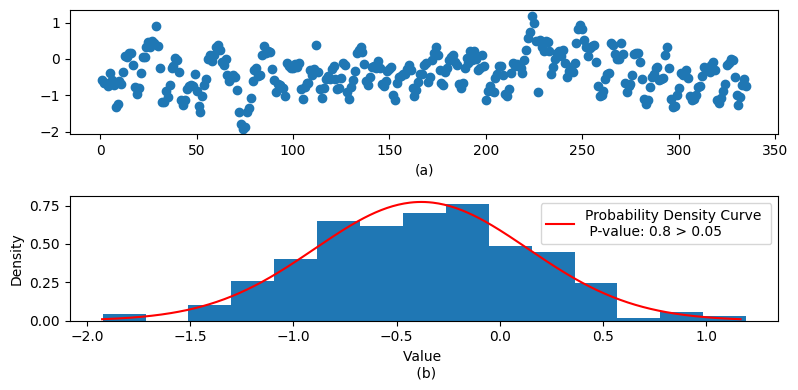

In [7]:
from scipy.stats import norm,shapiro
mean = np.mean(delta_Y)
std_dev = np.std(delta_Y, ddof=1)  # 这是 S 图的样本标准差
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 335)
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Shapiro-Wilk test
W, p = shapiro(delta_Y)
 
fontsize=10
fig = plt.figure(figsize=(8,4))
plt.subplot(2,1,1)
plt.scatter(np.linspace(1,len(delta_Y),len(delta_Y)).astype(int),delta_Y)
plt.xlabel('(a)',fontsize=fontsize)
plt.subplot(2,1,2)
plt.hist(delta_Y,bins=15,density=True)
plt.plot(x, pdf, color='r',label="Probability Density Curve \n P-value: "+str(round(p,3))+" > 0.05")
plt.xlabel('Value \n (b)',fontsize=fontsize)
plt.ylabel('Density',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.show()
fig.savefig('./Residual distribution in WINTER.svg',dpi=300, bbox_inches='tight')

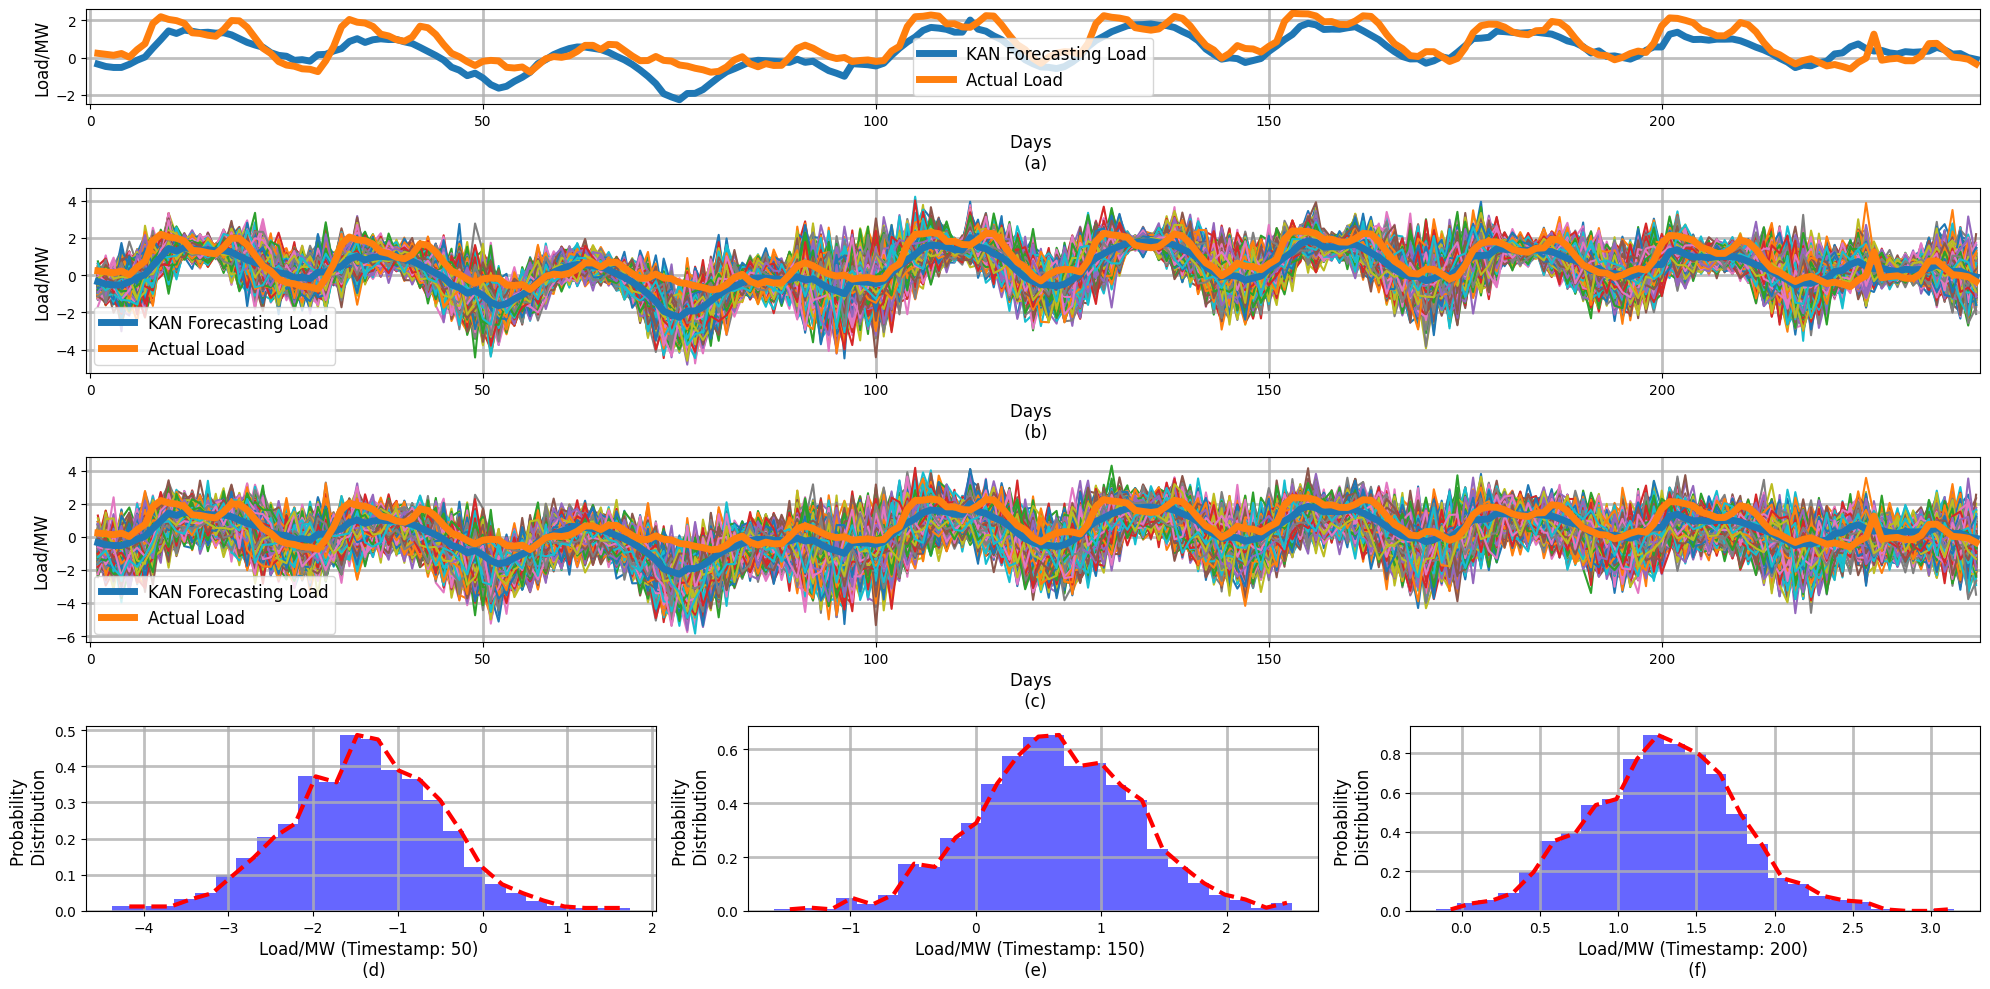

In [8]:
fontsize=12

fig = plt.figure(figsize=(20,10))
spec = gridspec.GridSpec(nrows=11, ncols=3, figure=fig)

ax0 = fig.add_subplot(spec[0:2,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)

ax0.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
# ax0.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax0.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax0.legend(fontsize=fontsize)
ax0.set_xlim(-0.5,240.5)
ax0.set_xlabel('Days \n (a)',fontsize=fontsize)
ax0.set_ylabel('Load/MW',fontsize=fontsize)
ax0.grid(alpha=0.8,linewidth=2)

ax1 = fig.add_subplot(spec[2:5,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)
pre_Y_appro_T = np.array(pre_Y_appro).T

for i in pre_Y_appro_T:
    ax1.plot(x_data,i[:240])

ax1.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
# ax1.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax1.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax1.legend(fontsize=fontsize)
ax1.set_xlim(-0.5,240.5)
ax1.set_xlabel('Days \n (b)',fontsize=fontsize)
ax1.set_ylabel('Load/MW',fontsize=fontsize)
ax1.grid(alpha=0.8,linewidth=2)

ax2 = fig.add_subplot(spec[5:8,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)
pre_Y_appro_T = np.array(pre_Y_appro).T
actual_pre_Y_appro_T = []
for i in pre_Y_appro_T:
    _temp_data = i+np.random.normal(mean,std_dev,size=335)
    ax2.plot(x_data,_temp_data[:240])
    actual_pre_Y_appro_T.append(_temp_data.tolist())

ax2.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
# ax2.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax2.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax2.legend(fontsize=fontsize)
ax2.set_xlim(-0.5,240.5)
ax2.set_xlabel('Days \n (c)',fontsize=fontsize)
ax2.set_ylabel('Load/MW',fontsize=fontsize)
ax2.grid(alpha=0.8,linewidth=2)

ax3 = fig.add_subplot(spec[8:11,0]) 
band_h = 0.2
cnts = ax3.hist(pre_Y_appro[50],density=True,color='blue',alpha=0.6,bins=25)
ax3.set_xlabel('Load/MW (Timestamp: 50) \n (d)',fontsize=fontsize)
ax3.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax3.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax3.grid(alpha=0.8,linewidth=2)

ax4 = fig.add_subplot(spec[8:11,1])
band_h = 0.2
cnts = ax4.hist(pre_Y_appro[150],density=True,color='blue',alpha=0.6,bins=25)
ax4.set_xlabel('Load/MW (Timestamp: 150) \n (e)',fontsize=fontsize)
ax4.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax4.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax4.grid(alpha=0.8,linewidth=2)

ax5 = fig.add_subplot(spec[8:11,2]) 
band_h = 0.2
cnts = ax5.hist(pre_Y_appro[200],density=True,color='blue',alpha=0.6,bins=25)
ax5.set_xlabel('Load/MW (Timestamp: 200) \n (f)',fontsize=fontsize)
ax5.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax5.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax5.grid(alpha=0.8,linewidth=2)

plt.tight_layout()
plt.show()

fig.savefig('./KAN for PLF in WINTER.svg',dpi=300, bbox_inches='tight')

In [9]:
def approximate_crps(Y, y):  
    """  
    Calculate an approximate CRPS for each time step.  
      
    Args:  
    Y (numpy.ndarray): Predicted load values, shape (24, 200).  
    y (numpy.ndarray): True load values, shape (24).  
      
    Returns:  
    float: The average approximate CRPS over all time steps.  
    """  
    # Ensure Y and y are numpy arrays  
    Y = np.array(Y).T  
    y = np.array(y)  
      
    # Initialize CRPS sum  
    crps_sum = 0.0  
      
    # Iterate over each time step  
    for i in range(Y.shape[0]):  
        # Sort the predicted values for this time step  
        sorted_Y = np.sort(Y[i])  
          
        # Find the position of the true value y[i] in the sorted predicted values  
        # Using np.searchsorted, which returns the index to insert y[i] to maintain order  
        pos = np.searchsorted(sorted_Y, y[i]) 
          
        # Calculate the CRPS for this time step using a simplified approach  
        # This approach assumes equal probability for each predicted value  
        # and calculates the average absolute difference between the true value  
        # and each predicted value (to the left and right of the true value).  
        if pos == 0:  # y[i] is less than all predicted values  
            crps = np.mean(sorted_Y - y[i])  
        elif pos == len(sorted_Y):  # y[i] is greater than all predicted values  
            crps = np.mean(y[i] - sorted_Y)  
        else:  
            # y[i] is within the range of predicted values  
            left_diff = y[i] - sorted_Y[:pos]  # Differences to the left of y[i]  
            right_diff = sorted_Y[pos:] - y[i]  # Differences to the right of y[i]  
            crps = np.mean(np.concatenate((left_diff, right_diff)))  
          
        # Add the CRPS for this time step to the sum  
        crps_sum += crps  
      
    # Return the average CRPS over all time steps  
    return crps_sum / Y.shape[0]  

def approximate_pinball(Y, y): 
    Y = np.array(Y).T  
    y = np.array(y) 
    # 定义我们想要计算的分位数  
    quantiles = [0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99]
      
    # 初始化Pinball损失  
    pinball_loss = 0  
      
    # 遍历每个时刻  
    for t in range(Y.shape[0]):  
        # 对每个时刻的预测值进行排序（如果Y的每一行不是已经排序的分位数）  
        sorted_Y_t = np.sort(Y[t])  
          
        # 计算分位数对应的预测值  
        quantile_values = np.interp(quantiles, np.linspace(0, 1, sorted_Y_t.shape[0]), sorted_Y_t)  
          
        # 计算Pinball损失  
        for q, quantile_value in zip(quantiles, quantile_values):  
            pinball_loss += max(q * (y[t] - quantile_value), (q - 1) * (y[t] -quantile_value))  
      
    # 平均Pinball损失  
    return pinball_loss / Y.shape[0]/ len(quantiles)

def RMSE(Y, y):
    Y = np.array(Y).T  
    y = np.array(y) 
    Y_mean = Y.mean(axis=1)   
    rmse = np.sqrt(np.mean((y - Y_mean) ** 2))  
    return rmse

def MAPE(Y,y):
    Y = np.array(Y).T  
    y = np.array(y) 
    Y_mean = Y.mean(axis=1)  
    epsilon = 1e-10  
    mape = np.mean(np.abs((y - Y_mean) / (y + epsilon))) * 100  
  
    return mape
    
def evaluation(_pre,_actual): 
    return [approximate_crps(_pre,_actual),approximate_pinball(_pre,_actual),RMSE(_pre,_actual),MAPE(_pre,_actual)]

In [10]:
# Calculate the score
result = dict()
result["KAN"] = evaluation(scaler_output.inverse_transform(np.array(actual_pre_Y_appro_T).reshape(1,-1)).reshape((1000, 335)), 
                           scaler_output.inverse_transform(np.array(pre_Y).reshape(1,-1)).reshape(-1))

In [11]:
for i in range(10):
    print(str(i+1)+"th feature mean: ",round(dataset['train_input'][:,i].mean(),2),
          " "+str(i+1)+"th feature var: ",round(dataset['train_input'][:,i].var(),2))

1th feature mean:  0.0  1th feature var:  1.0
2th feature mean:  0.0  2th feature var:  1.0
3th feature mean:  0.0  3th feature var:  1.0
4th feature mean:  0.0  4th feature var:  1.0
5th feature mean:  0.0  5th feature var:  1.0
6th feature mean:  0.0  6th feature var:  1.0
7th feature mean:  0.0  7th feature var:  1.0
8th feature mean:  0.0  8th feature var:  1.0
9th feature mean:  -0.0  9th feature var:  1.0
10th feature mean:  0.0  10th feature var:  1.0


<Figure size 640x480 with 0 Axes>

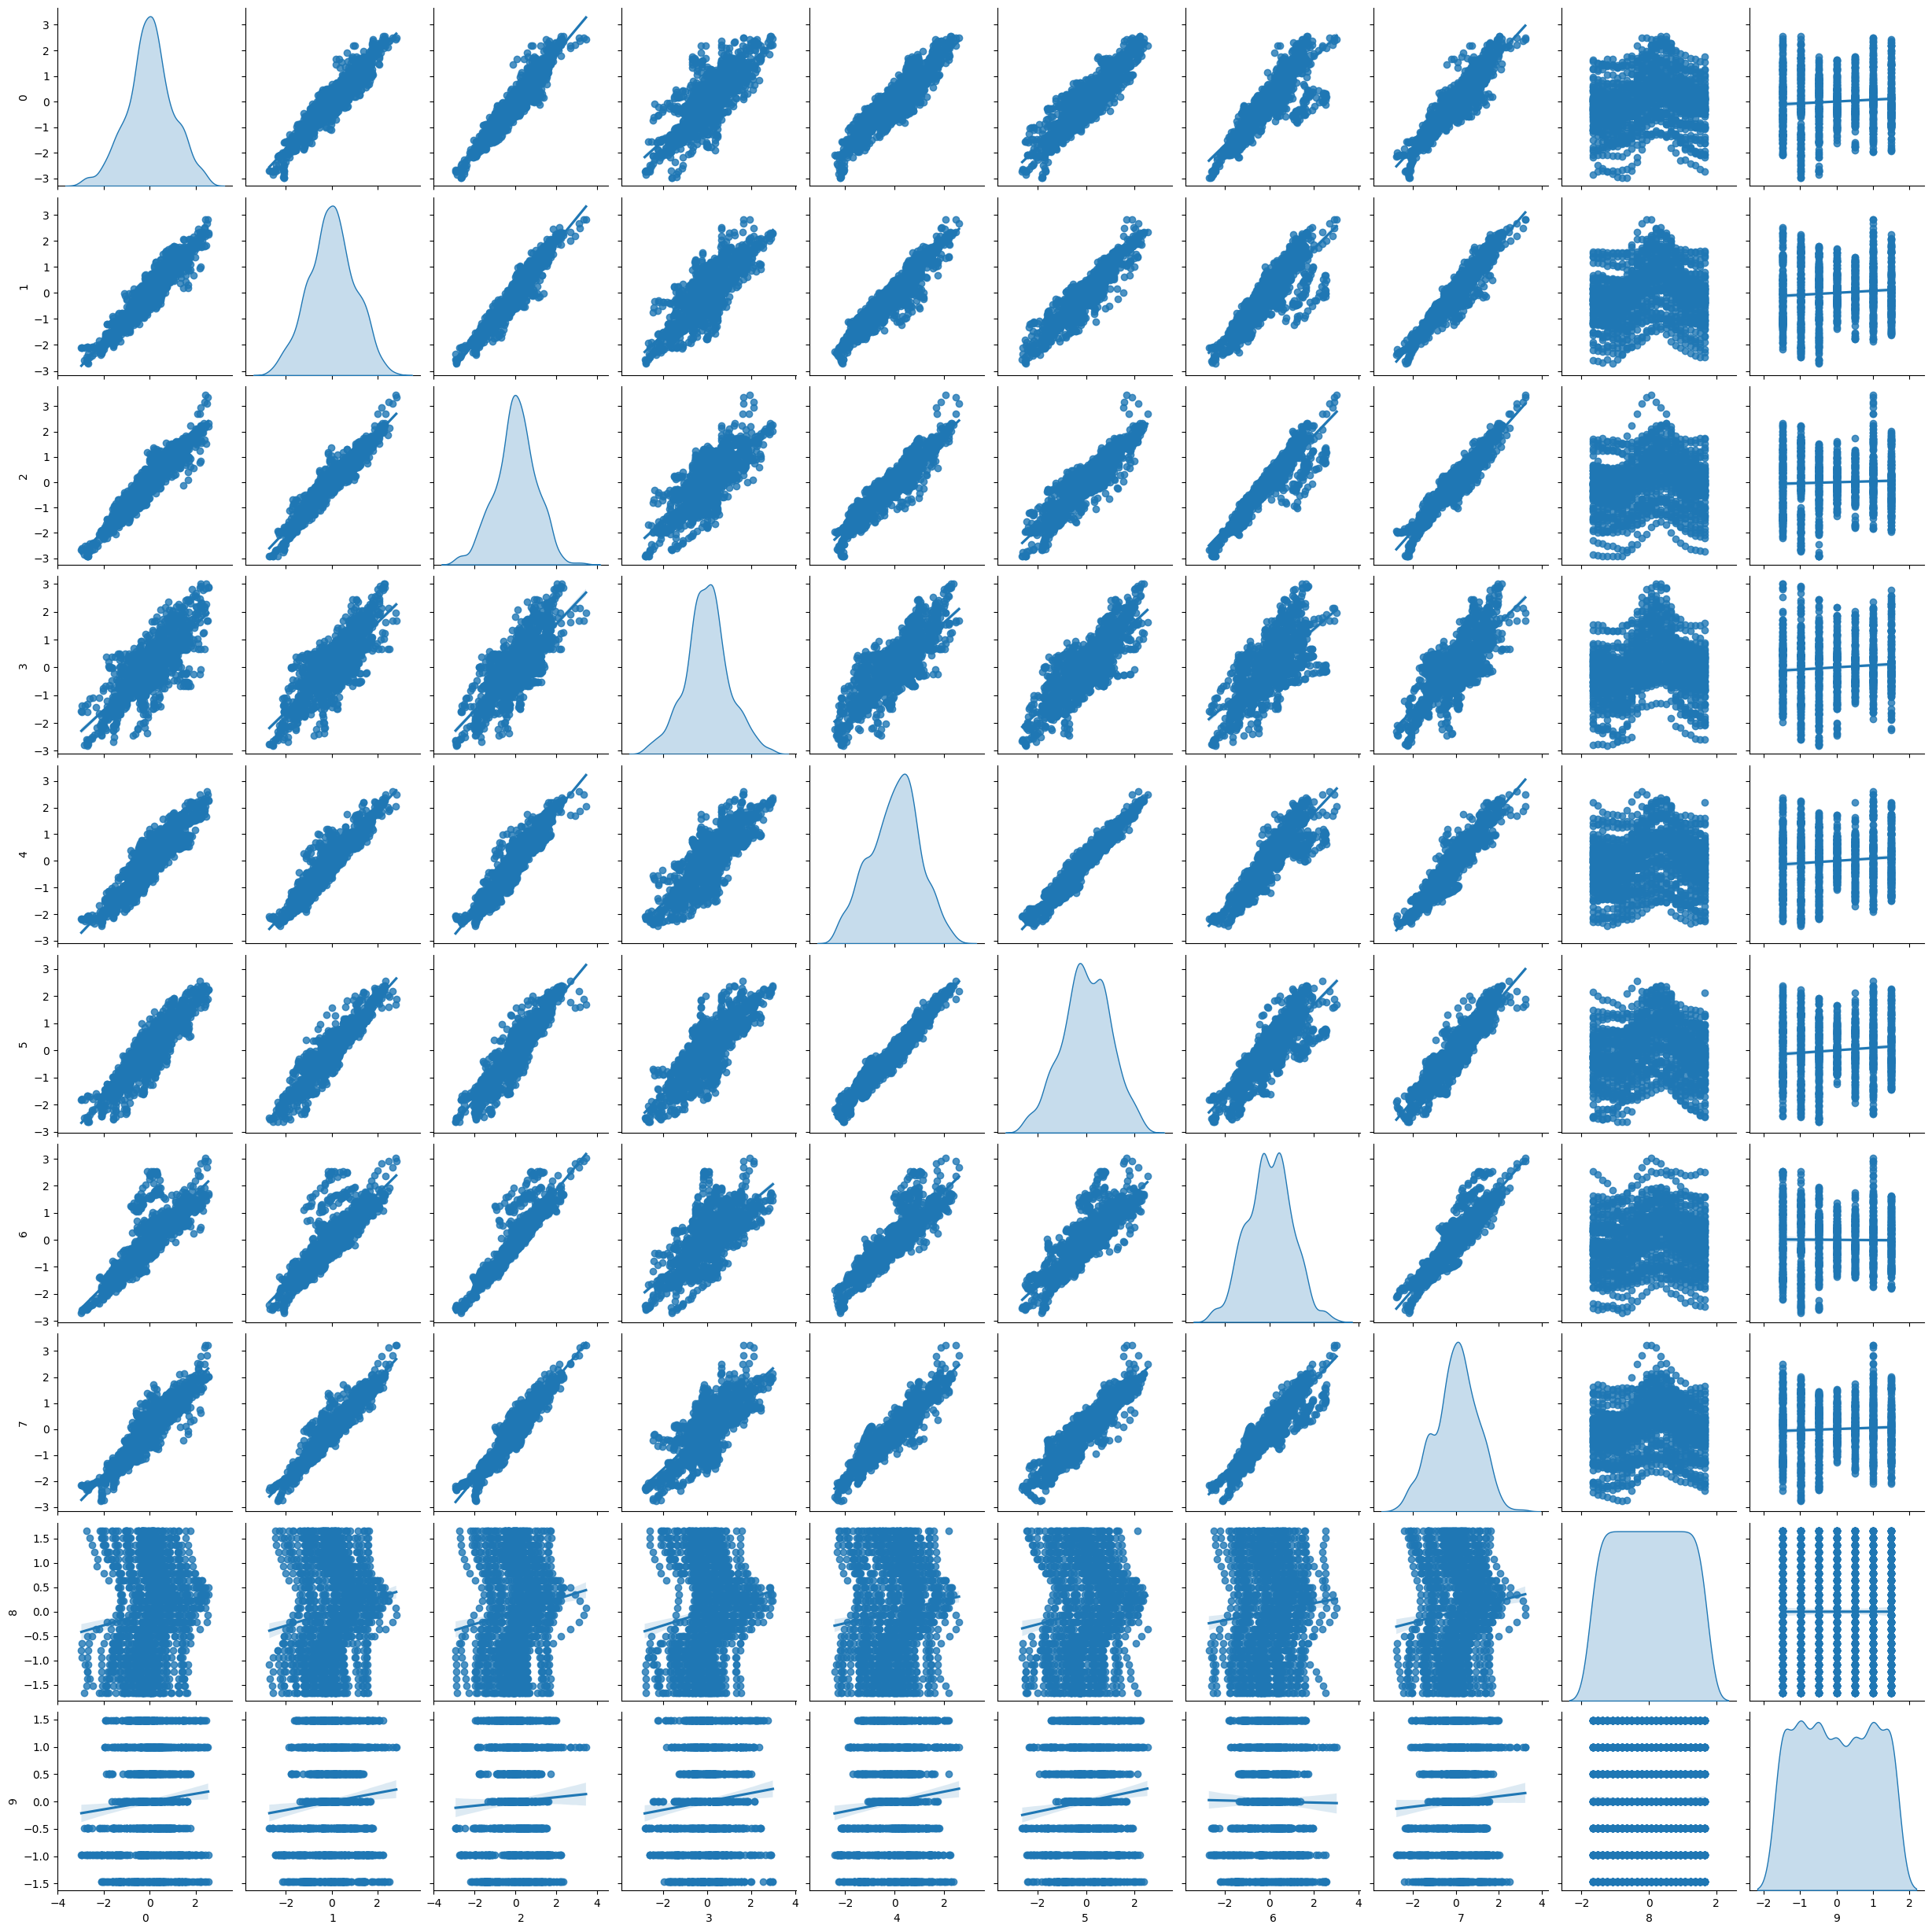

In [12]:
import seaborn as sns
import pandas as pd
plt.figure()
sns.pairplot(pd.DataFrame(dataset["train_input"]),kind='reg',diag_kind='kde')
plt.show()

In [13]:
x_name = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]

interval_num = 11

df_dict = {}  
for i in range(1, interval_num):  
    df_dict[f'df{i}'] = lambdify([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10], diff(Y, locals()[x_name[i-1]]))  
  
expand_points = np.linspace(-3,3,interval_num).tolist()
points = []
for i in range(interval_num):
    for j in range(interval_num):
        for k in range(interval_num):
            points.append((expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[i],
                           expand_points[j],
                           expand_points[k]))
            
# 计算导数在这些点上的值，以及 Y 的值  
results = {}  
for idx, point in enumerate(points):  
    for key, df in df_dict.items():  
        # 使用 locals() 动态创建变量名  
        locals()[key + f'_value_{idx}'] = df(*point)  
    # 计算 Y 的值（假设 Y 是某种函数的结果，这里使用 f 作为示例）  
    locals()[f'Y_value_{idx}'] = f(*point, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # 根据 f 函数的实际参数调整  

In [14]:
x1_, x2_, x3_, x4_, x5_, x6_, x7_, x8_, x9_, x10_ = symbols('x1_ x2_ x3_ x4_ x5_ x6_ x7_ x8_ x9_ x10_')
for i in range(interval_num*interval_num*interval_num):
    locals()[f'approx_Y_talor_expand_{i}'] = (locals()[f'Y_value_{i}'] +
                                              locals()[f'df1_value_{i}']*(x1-x1_) +
                                              locals()[f'df2_value_{i}']*(x2-x2_) +
                                              locals()[f'df3_value_{i}']*(x3-x3_) +
                                              locals()[f'df4_value_{i}']*(x4-x4_) +
                                              locals()[f'df5_value_{i}']*(x5-x5_) +
                                              locals()[f'df6_value_{i}']*(x6-x6_) +
                                              locals()[f'df7_value_{i}']*(x7-x7_) +
                                              locals()[f'df8_value_{i}']*(x8-x8_) +
                                              locals()[f'df9_value_{i}']*(x9-x9_) +
                                              locals()[f'df10_value_{i}']*(x10-x10_))
    locals()[f'approx_Y_talor_expand_UQ_{i}'] = (locals()[f'Y_value_{i}'] +
                                              locals()[f'df1_value_{i}']*(x1-x1_+dx1) +
                                              locals()[f'df2_value_{i}']*(x2-x2_+dx2) +
                                              locals()[f'df3_value_{i}']*(x3-x3_+dx3) +
                                              locals()[f'df4_value_{i}']*(x4-x4_+dx4) +
                                              locals()[f'df5_value_{i}']*(x5-x5_+dx5) +
                                              locals()[f'df6_value_{i}']*(x6-x6_+dx6) +
                                              locals()[f'df7_value_{i}']*(x7-x7_+dx7) +
                                              locals()[f'df8_value_{i}']*(x8-x8_+dx8) +
                                              locals()[f'df9_value_{i}']*(x9-x9_+dx9) +
                                              locals()[f'df10_value_{i}']*(x10-x10_+dx10))

In [15]:
for i in range(interval_num*interval_num*interval_num):
    locals()[f'f_Y_talor_expand_{i}'] = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x1_,x2_,x3_,x4_,x5_,x6_,x7_,x8_,x9_,x10_],
                                                 locals()[f'approx_Y_talor_expand_{i}']) 
    locals()[f'f_Y_talor_expand_UQ_{i}'] = lambdify([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x1_,x2_,x3_,x4_,x5_,x6_,x7_,x8_,x9_,x10_,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10], 
                                                    locals()[f'approx_Y_talor_expand_UQ_{i}']) 

In [16]:
import bisect 
def check_flag(_data):
    interval_points = np.linspace(-3-(-3)/(interval_num-1),3+(-3)/(interval_num-1),interval_num-1).tolist()
    
    _data_sum_1 = _data[:8].mean()
    flag = (bisect.bisect_right(interval_points, _data_sum_1)*interval_num*interval_num +
            bisect.bisect_right(interval_points, _data[-2])*interval_num + 
            bisect.bisect_right(interval_points, _data[-1]))  

    return flag

In [17]:
import time
pre_Y_talor_expand_UQ = []
pre_Y_talor_expand = []
delta_Y = []
start_time = time.time()
for i,_data in enumerate(dataset['test_input']):
    pre_Y_talor_expand_UQ.append([])
    flag = check_flag(_data)
    # flag = 62
    for sample in range(sample_nums):
        dx = np.random.normal(loc = 0, scale = 0.5, size = (8)).tolist()
        dx.append(0)
        dx.append(0)
        dx = np.array(dx)
        locals()[f'_approx_Y_talor_expand_UQ'] = locals()[f'f_Y_talor_expand_UQ_{flag}'](_data[0],
                                                                                         _data[1],
                                                                                         _data[2],
                                                                                         _data[3],
                                                                                         _data[4],
                                                                                         _data[5],
                                                                                         _data[6],
                                                                                         _data[7],
                                                                                         _data[8],
                                                                                         _data[9],
                                                                                         points[flag][0],
                                                                                         points[flag][1],
                                                                                         points[flag][2],
                                                                                         points[flag][3],
                                                                                         points[flag][4],
                                                                                         points[flag][5],
                                                                                         points[flag][6],
                                                                                         points[flag][7],
                                                                                         points[flag][8],
                                                                                         points[flag][9],
                                                                                         dx[0],
                                                                                         dx[1],
                                                                                         dx[2],
                                                                                         dx[3],
                                                                                         dx[4],
                                                                                         dx[5],
                                                                                         dx[6],
                                                                                         dx[7],
                                                                                         dx[8],
                                                                                         dx[9])         
        pre_Y_talor_expand_UQ[i].append(_approx_Y_talor_expand_UQ)

    _f_Y_talor_expand = locals()[f'f_Y_talor_expand_{flag}'](_data[0],
                                                              _data[1],
                                                              _data[2],
                                                              _data[3],
                                                              _data[4],
                                                              _data[5],
                                                              _data[6],
                                                              _data[7],
                                                              _data[8],
                                                              _data[9],
                                                              points[flag][0],
                                                              points[flag][1],
                                                              points[flag][2],
                                                              points[flag][3],
                                                              points[flag][4],
                                                              points[flag][5],
                                                              points[flag][6],
                                                              points[flag][7],
                                                              points[flag][8],
                                                              points[flag][9])
    pre_Y_talor_expand.append(_f_Y_talor_expand)
end_time = time.time()
print(end_time-start_time)

9.374964237213135


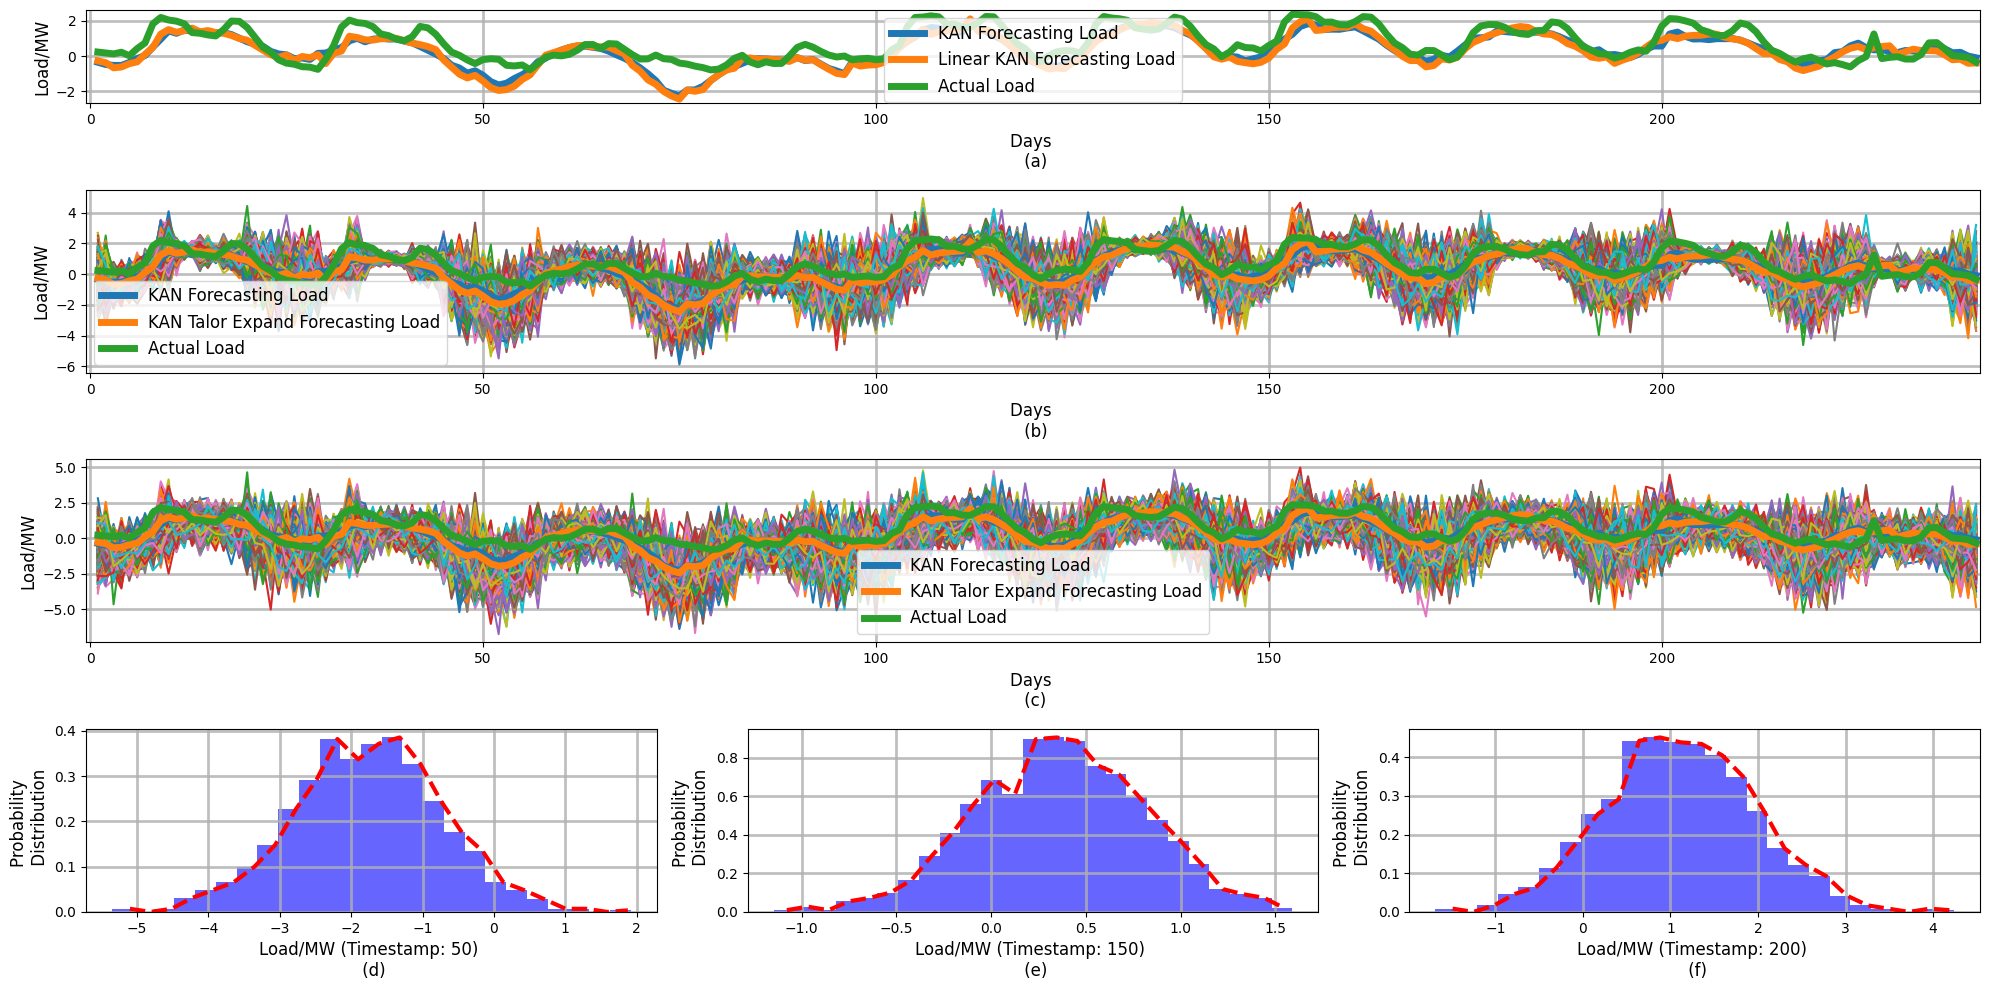

In [18]:
fontsize=12

fig = plt.figure(figsize=(20,10))
spec = gridspec.GridSpec(nrows=11, ncols=3, figure=fig)

ax0 = fig.add_subplot(spec[0:2,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)

ax0.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax0.plot(x_data,pre_Y_talor_expand[:240],label = 'Linear KAN Forecasting Load',linewidth=5)  
# ax0.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax0.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax0.legend(fontsize=fontsize)
ax0.set_xlim(-0.5,240.5)
ax0.set_xlabel('Days \n (a)',fontsize=fontsize)
ax0.set_ylabel('Load/MW',fontsize=fontsize)
ax0.grid(alpha=0.8,linewidth=2)

ax1 = fig.add_subplot(spec[2:5,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)
pre_Y_talor_expand_UQ_T = np.array(pre_Y_talor_expand_UQ).T

for i in pre_Y_talor_expand_UQ_T:
    ax1.plot(x_data,i[:240])

ax1.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax1.plot(x_data,pre_Y_talor_expand[:240],label = 'KAN Talor Expand Forecasting Load',linewidth=5)  
# ax1.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax1.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax1.legend(fontsize=fontsize)
ax1.set_xlim(-0.5,240.5)
ax1.set_xlabel('Days \n (b)',fontsize=fontsize)
ax1.set_ylabel('Load/MW',fontsize=fontsize)
ax1.grid(alpha=0.8,linewidth=2)

ax2 = fig.add_subplot(spec[5:8,:]) 
x_data = np.linspace(1,dataset['test_label'][:240].shape[0],dataset['test_label'][:240].shape[0]).astype(int)
pre_Y_talor_expand_UQ_T = np.array(pre_Y_talor_expand_UQ).T
actual_pre_Y_talor_expand_UQ_T = []
for i in pre_Y_talor_expand_UQ_T:
    _temp_data = i+np.random.normal(mean,std_dev,size=335)
    ax2.plot(x_data,_temp_data[:240])
    actual_pre_Y_talor_expand_UQ_T.append(_temp_data.tolist())

ax2.plot(x_data,pre_Y[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax2.plot(x_data,pre_Y_talor_expand[:240],label = 'KAN Talor Expand Forecasting Load',linewidth=5)  
# ax2.plot(x_data,pre_Y_appro_one_order[:240],label = 'KAN Forecasting Load',linewidth=5)  
ax2.plot(x_data,dataset['test_label'][:240],label = 'Actual Load',linewidth=5)
ax2.legend(fontsize=fontsize)
ax2.set_xlim(-0.5,240.5)
ax2.set_xlabel('Days \n (c)',fontsize=fontsize)
ax2.set_ylabel('Load/MW',fontsize=fontsize)
ax2.grid(alpha=0.8,linewidth=2)

ax3 = fig.add_subplot(spec[8:11,0]) 
band_h = 0.2
cnts = ax3.hist(pre_Y_talor_expand_UQ[50],density=True,color='blue',alpha=0.6,bins=25)
ax3.set_xlabel('Load/MW (Timestamp: 50) \n (d)',fontsize=fontsize)
ax3.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax3.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax3.grid(alpha=0.8,linewidth=2)

ax4 = fig.add_subplot(spec[8:11,1])
band_h = 0.2
cnts = ax4.hist(pre_Y_talor_expand_UQ[150],density=True,color='blue',alpha=0.6,bins=25)
ax4.set_xlabel('Load/MW (Timestamp: 150) \n (e)',fontsize=fontsize)
ax4.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax4.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax4.grid(alpha=0.8,linewidth=2)

ax5 = fig.add_subplot(spec[8:11,2]) 
band_h = 0.2
cnts = ax5.hist(pre_Y_talor_expand_UQ[200],density=True,color='blue',alpha=0.6,bins=25)
ax5.set_xlabel('Load/MW (Timestamp: 200) \n (f)',fontsize=fontsize)
ax5.set_ylabel('Probability \n Distribution',fontsize=fontsize)
ax5.plot(cnts[1][1:] - band_h / 5, cnts[0],color='red', linewidth=3, linestyle='--')
ax5.grid(alpha=0.8,linewidth=2)

plt.tight_layout()
plt.show()

fig.savefig('./Linear KAN for PLF in WINTER.svg',dpi=300, bbox_inches='tight')

In [19]:
# Calculate the score
result["Linear KAN"] = evaluation(scaler_output.inverse_transform(np.array(actual_pre_Y_talor_expand_UQ_T).reshape(1,-1)).reshape((1000, 335)), 
                           scaler_output.inverse_transform(np.array(pre_Y).reshape(1,-1)).reshape(-1))

In [20]:
import torch
class QNN(torch.nn.Module):
    def __init__(self, quantile=0.9):
        super(QNN, self).__init__()
        self.fc1 = torch.nn.Linear(10, 16)
        self.fc2 = torch.nn.Linear(16, 1)
        self.quantile = quantile
 
    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        y = self.fc2(x)
        return y

    def loss_func(self, x, y_actual):
        y_pre = self.forward(x)
        err = y-y_pre
        loss = torch.mean(torch.maximum(self.quantile * err, (self.quantile-1) * err))         
        return loss

loader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(torch.tensor(dataset['train_input']), 
                                                                             torch.tensor(dataset['train_label'])), 
                                      batch_size=128, 
                                      shuffle=True)

In [21]:
pre_QNN_T = []
percentiles = [0.01,0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.98,0.99]
for quantile in percentiles:
    QNN_model = QNN(quantile=quantile)
    optimizer_1 = torch.optim.Adam(QNN_model.parameters(), lr = 0.01)
    
    for epoch in range(100):
        for step, (x,y) in enumerate(loader):          # for each training step
            output = QNN_model(x)                           # get output for every net
            loss_1 = QNN_model.loss_func(x,y)                # compute loss for every net
            optimizer_1.zero_grad()                             # clear gradients for next train
            loss_1.backward()                             # backpropagation, compute gradients
            optimizer_1.step()                                  # apply gradients
    distrurb = np.hstack((np.random.normal(loc = 0, scale = 0.5, size = (335,8)),np.zeros(shape=(335,2))))
    pre_QNN_T.append(QNN_model.forward(torch.tensor(dataset['test_input']+distrurb.astype(np.float32))).detach().numpy()[:,0].tolist())

In [22]:
# Calculate the score
result["Quantile based ANN"] = evaluation(scaler_output.inverse_transform(np.array(pre_QNN_T).reshape(1,-1)).reshape((23, 335)), 
                           scaler_output.inverse_transform(np.array(pre_Y).reshape(1,-1)).reshape(-1))

C:\Users\23124862r\AppData\Local\Temp\ipykernel_22300\2170445463.py:213: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


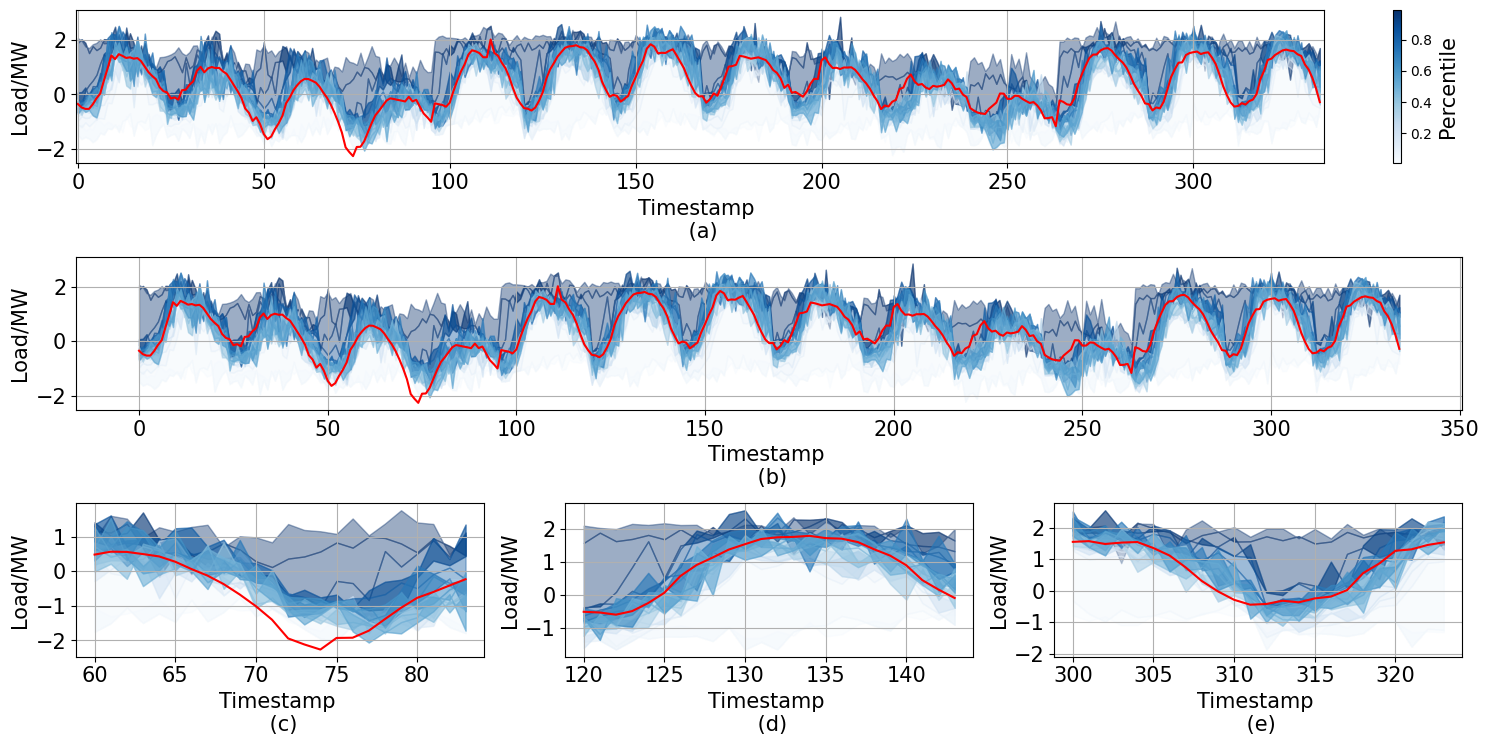

In [23]:
# 绘制负荷曲线并填充区间
fig = plt.figure(figsize=(15, 8))
spec = gridspec.GridSpec(nrows=7, ncols=3, figure=fig)

ax1 = fig.add_subplot(spec[:2,:]) 
# 生成模拟的负荷数据
start_index = 0
end_index = 335
hours = np.arange(0, end_index - start_index, 1)  # 每半小时一个数据点

# 定义分位数
percentile_loads = np.array(pre_QNN_T)
# 创建颜色映射
cmap = plt.get_cmap("Blues")
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
colors = [cmap(norm(p)) for p in percentiles]
# colors = ['r','b','y','g','black']

# 填充中位数上下的区间
for i in range(len(percentiles) // 2):
    lower_idx = i
    upper_idx = len(percentiles) - 1 - i
    if i in [1,3,5,8]:
        ax1.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4, label=f'{percentiles[lower_idx]}th - {percentiles[lower_idx + 1]}th Percentile')
        ax1.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4, label=f'{percentiles[upper_idx - 1]}th - {percentiles[upper_idx]}th Percentile')
    else:
        ax1.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4)
        ax1.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4)
# # 绘制中位数曲线
# plt.plot(hours, percentile_loads[len(percentiles) // 2], color=colors[len(percentiles) // 2], label=f'{percentiles[len(percentiles) // 2]}th Percentile', linewidth=2)
ax1.plot(pre_Y[:end_index],c='r',label="Actual Generation")
ax1.set_xlabel('Timestamp \n (a)',fontsize=15)
# plt.xticks(np.arange(0, end_index - start_index, 1),np.arange(start_index, end_index, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax1.set_ylabel('Load/MW',fontsize=15)
# ax1.legend(fontsize=10,loc='right')
ax1.grid(True)

ax1.set_xlim(0-0.5,end_index+0.05)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm,
                    ax=plt.gca(),fraction=0.05)
cbar.set_label('Percentile',fontsize=15)


ax2 = fig.add_subplot(spec[2:4,:]) 
# 生成模拟的负荷数据

start_index = 0
end_index = 335
hours = np.arange(0, end_index - start_index, 1)  # 每半小时一个数据点

# 定义分位数
percentile_loads = np.array(pre_QNN_T)

# 创建颜色映射
cmap = plt.get_cmap("Blues")
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
colors = [cmap(norm(p)) for p in percentiles]
# colors = ['r','b','y','g','black']

# 填充中位数上下的区间
for i in range(len(percentiles) // 2):
    lower_idx = i
    upper_idx = len(percentiles) - 1 - i
    if i in [1,8]:
        ax2.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4, label=f'{percentiles[lower_idx]}th - {percentiles[lower_idx + 1]}th Percentile')
        ax2.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4, label=f'{percentiles[upper_idx - 1]}th - {percentiles[upper_idx]}th Percentile')
    else:
        ax2.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4)
        ax2.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4)
        
# # 绘制中位数曲线
# plt.plot(hours, percentile_loads[len(percentiles) // 2], color=colors[len(percentiles) // 2], label=f'{percentiles[len(percentiles) // 2]}th Percentile', linewidth=2)
ax2.plot(pre_Y[:end_index],c='r',label="Actual Generation")
ax2.set_xlabel('Timestamp \n (b)',fontsize=15)
# plt.xticks(np.arange(0, end_index - start_index, 1),np.arange(start_index, end_index, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax2.set_ylabel('Load/MW',fontsize=15)
# ax2.legend(fontsize=10)
ax2.grid(True)

# # 添加颜色条
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm,
#                     ax=plt.gca())
# cbar.set_label('Percentile',fontsize=15)



ax3 = fig.add_subplot(spec[4:6,0]) 
start_index = 60
end_index = 84
hours = np.arange(0, end_index - start_index, 1)+start_index  # 每半小时一个数据点

# 定义分位数
percentile_loads = np.array(pre_QNN_T)[:,start_index:end_index]

# 创建颜色映射
cmap = plt.get_cmap("Blues")
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
colors = [cmap(norm(p)) for p in percentiles]
# colors = ['r','b','y','g','black']

# 填充中位数上下的区间
for i in range(len(percentiles) // 2):
    lower_idx = i
    upper_idx = len(percentiles) - 1 - i
    if i in [1,5,8,12]:
        ax3.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4, label=f'{percentiles[lower_idx]}th - {percentiles[lower_idx + 1]}th Percentile')
        ax3.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4, label=f'{percentiles[upper_idx - 1]}th - {percentiles[upper_idx]}th Percentile')
    else:
        ax3.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4)
        ax3.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4)
        
# # 绘制中位数曲线
# plt.plot(hours, percentile_loads[len(percentiles) // 2], color=colors[len(percentiles) // 2], label=f'{percentiles[len(percentiles) // 2]}th Percentile', linewidth=2)
ax3.plot(hours,pre_Y[start_index:end_index],c='r',label="Actual Generation")
ax3.set_xlabel('Timestamp \n (c)',fontsize=15)
# plt.xticks(np.arange(0, end_index - start_index, 1),np.arange(start_index, end_index, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax3.set_ylabel('Load/MW',fontsize=15)
# ax3.legend(fontsize=15)
ax3.grid(True)

# # 添加颜色条
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm,
#                     ax=plt.gca())
# cbar.set_label('Percentile',fontsize=15)

ax4 = fig.add_subplot(spec[4:6,1]) 
start_index = 120
end_index = start_index+24
hours = np.arange(0, end_index - start_index, 1)+start_index  # 每半小时一个数据点

# 定义分位数
percentile_loads = np.array(pre_QNN_T)[:,start_index:end_index]

# 创建颜色映射
cmap = plt.get_cmap("Blues")
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
colors = [cmap(norm(p)) for p in percentiles]
# colors = ['r','b','y','g','black']

# 填充中位数上下的区间
for i in range(len(percentiles) // 2):
    lower_idx = i
    upper_idx = len(percentiles) - 1 - i
    if i in [1,3,5,8]:
        ax4.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4, label=f'{percentiles[lower_idx]}th - {percentiles[lower_idx + 1]}th Percentile')
        ax4.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4, label=f'{percentiles[upper_idx - 1]}th - {percentiles[upper_idx]}th Percentile')
    else:
        ax4.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4)
        ax4.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4)
       
# # 绘制中位数曲线
# plt.plot(hours, percentile_loads[len(percentiles) // 2], color=colors[len(percentiles) // 2], label=f'{percentiles[len(percentiles) // 2]}th Percentile', linewidth=2)
ax4.plot(hours,pre_Y[start_index:end_index],c='r',label="Actual Generation")
ax4.set_xlabel('Timestamp \n (d)',fontsize=15)
# plt.xticks(np.arange(0, end_index - start_index, 1),np.arange(start_index, end_index, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax4.set_ylabel('Load/MW',fontsize=15)
# ax3.legend(fontsize=15)
ax4.grid(True)

ax5 = fig.add_subplot(spec[4:6,2]) 
start_index = 300
end_index = start_index+24
hours = np.arange(0, end_index - start_index, 1)+start_index  # 每半小时一个数据点

# 定义分位数
percentile_loads = np.array(pre_QNN_T)[:,start_index:end_index]
# 创建颜色映射
cmap = plt.get_cmap("Blues")
norm = mcolors.Normalize(vmin=min(percentiles), vmax=max(percentiles))
colors = [cmap(norm(p)) for p in percentiles]
# colors = ['r','b','y','g','black']

# 填充中位数上下的区间
for i in range(len(percentiles) // 2):
    lower_idx = i
    upper_idx = len(percentiles) - 1 - i
    if i in [1,3,5,8]:
        ax5.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4, label=f'{percentiles[lower_idx]}th - {percentiles[lower_idx + 1]}th Percentile')
        ax5.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4, label=f'{percentiles[upper_idx - 1]}th - {percentiles[upper_idx]}th Percentile')
    else:
        ax5.fill_between(hours, percentile_loads[lower_idx], percentile_loads[lower_idx + 1], color=colors[lower_idx + 1], alpha=0.4)
        ax5.fill_between(hours, percentile_loads[upper_idx - 1], percentile_loads[upper_idx], color=colors[upper_idx], alpha=0.4)
        
# # 绘制中位数曲线
# plt.plot(hours, percentile_loads[len(percentiles) // 2], color=colors[len(percentiles) // 2], label=f'{percentiles[len(percentiles) // 2]}th Percentile', linewidth=2)
ax5.plot(hours,pre_Y[start_index:end_index],c='r',label="Actual Generation")
ax5.set_xlabel('Timestamp \n (e)',fontsize=15)
# plt.xticks(np.arange(0, end_index - start_index, 1),np.arange(start_index, end_index, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax5.set_ylabel('Load/MW',fontsize=15)
# ax3.legend(fontsize=15)
ax5.grid(True)


plt.tight_layout()
fig.show()

fig.savefig('./QNN for PLF in WINTER.svg',dpi=300, bbox_inches='tight')

In [24]:
result

{'KAN': [561.1470630290412,
  92.33426201341005,
  300.7393618456739,
  4.131193514546229],
 'Linear KAN': [628.6677110771049,
  108.42377497881743,
  382.0885499047574,
  4.973167142081947],
 'Quantile based ANN': [487.24921312414426,
  81.70175645971885,
  295.2306410326034,
  3.172410499347188]}